In [1]:
import numpy as np
import matplotlib.pyplot as plt
import shutil
from tensorboard.backend.event_processing import event_accumulator
import subprocess
import webbrowser
import os

In [2]:
def get_summary(save_path,prepend=""):
    ea = event_accumulator.EventAccumulator(save_path)
    if not os.path.exists(save_path):
        print("no save path found, returning empy dict...")
        return dict()
    ea.Reload()
    res = dict()
    for tag in ea.Tags()['scalars']:
        evs = ea.Scalars(tag)
        wall_time = [e.wall_time for e in evs]
        step = [e.step for e in evs]
        value = [e.value for e in evs]
        tag = prepend + tag
        res[tag] = value
        res[tag+"_step"] = step
        res[tag + "_wall_time"] = wall_time
    res[prepend + 'scalars'] = [prepend + t for t in ea.Tags()['scalars']]
    scalars = ea.Tags()['scalars']
    print("> get_summary():%s*; got %i scalars %s" % (prepend, len(scalars), ", ".join(scalars)))

    drs = os.listdir(save_path)
    for d in drs:
        np = os.path.join(save_path, d)
        if os.path.isdir(np):
            res.update( get_summary(np, d+'/') )
    return res

In [4]:
logs = get_summary('C:\\Users\\ejer\\Desktop\\Skole\\Universitet\\02460ADVANCEDMACHINELEARNING\\Project\\DoomEnvir\\doomenvir\\gdoom\\Predict\\predicts6')

> get_summary():*; got 0 scalars 
INFO:tensorflow:Directory watcher advancing from C:\Users\ejer\Desktop\Skole\Universitet\02460ADVANCEDMACHINELEARNING\Project\DoomEnvir\doomenvir\gdoom\Predict\predicts6\train_v2s6_lr=0.0001_bs=10_0\events.out.tfevents.1556454678.TOBIAS-PC to C:\Users\ejer\Desktop\Skole\Universitet\02460ADVANCEDMACHINELEARNING\Project\DoomEnvir\doomenvir\gdoom\Predict\predicts6\train_v2s6_lr=0.0001_bs=10_0\events.out.tfevents.1556964125.TOBIAS-PC
INFO:tensorflow:No path found after C:\Users\ejer\Desktop\Skole\Universitet\02460ADVANCEDMACHINELEARNING\Project\DoomEnvir\doomenvir\gdoom\Predict\predicts6\train_v2s6_lr=0.0001_bs=10_0\events.out.tfevents.1556964125.TOBIAS-PC
> get_summary():train_v2s6_lr=0.0001_bs=10_0/*; got 9 scalars Perf/Reward, Perf/Length, Perf/Value, Perf/Kills, Losses/Value Loss, Losses/Policy Loss, Losses/Entropy, Losses/Grad Norm, Losses/Var Norm
INFO:tensorflow:Directory watcher advancing from C:\Users\ejer\Desktop\Skole\Universitet\02460ADVANCEDMA

In [64]:
timealive_0 = logs['train_v2s6_lr=0.0001_bs=10_0/Perf/Length']
timealive_1 = logs['train_v2s6_lr=0.0001_bs=10_1/Perf/Length']
timealive_2 = logs['train_v2s6_lr=0.0001_bs=10_2/Perf/Length']
timealive_3 = logs['train_v2s6_lr=0.0001_bs=10_3/Perf/Length']
timealive_0 = np.asarray(timealive_0)
timealive_1 = np.asarray(timealive_1)
timealive_2 = np.asarray(timealive_2)
timealive_3 = np.asarray(timealive_3)

# the total number of frames used to train:
timealive=timealive_0.sum()+timealive_1.sum()+timealive_2.sum()+timealive_3.sum()
timealive_all=[timealive_0,timealive_1,timealive_2,timealive_3]
timealive

178431.80009937286

In [65]:
timealive_all.mean()

AttributeError: 'list' object has no attribute 'mean'

In [57]:
# Average time alive in the last 100 episodes
timealive[-20:-1].mean()

IndexError: invalid index to scalar variable.

In [49]:
kills_0 = np.asarray(logs['train_v2s6_lr=0.0001_bs=30_0/Perf/Kills'])
kills_1 = np.asarray(logs['train_v2s6_lr=0.0001_bs=30_1/Perf/Kills'])
kills_2 = np.asarray(logs['train_v2s6_lr=0.0001_bs=30_2/Perf/Kills'])
kills_3 = np.asarray(logs['train_v2s6_lr=0.0001_bs=30_3/Perf/Kills'])
# Average kills over last 100 episodes
int(round(kills[-200:-1].mean(), 10))

0

In [51]:
#kills_0[-20:-1].mean()
len(timealive_0)
len(kills_0)

1200

ValueError: x and y must be the same size

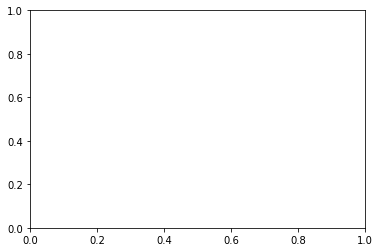

In [42]:
plt.figure()
plt.scatter(timealive_0,kills_0)
plt.scatter(timealive_1,kills_1)
plt.scatter(timealive_2,kills_2)
plt.scatter(timealive_3,kills_3)